<a href="https://colab.research.google.com/github/RaffaNimir/Python-Programs-Fun/blob/main/Human_Activity_Recognition_with_Smartphones_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Human Activity Recognition with Smartphones Classifier

- In this module, Naïve Bayes, MaxEnt, and Support Vector classifiers will be fitted to [the Human Activity Recognition with Smartphones dataset](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones). The objective is to select a metric to score the quality of the classifiers and justify the choice of metric in the context of a specific problem that the data would address.

- Once the metric is chosen, the performance of the three classifiers will be compared, and the classifier that achieves the highest scores will be indicated. Speculation will also be made as to why this might be the case, given our knowledge of the dataset.

- Finally, contingency tables and plots of the ROC curve for each classifier will be provided. This will help us determine the strengths and weaknesses of each classifier for our specific dataset.

### Tasks:

 1 - The dataset identified above will be fitted with Naïve Bayes, MaxEnt, and Support Vector classifiers.

 2 -  A metric will be selected to score the quality of the classifiers, and the choice of metric will be justified in the context of a specific problem that the data would address.

3 - The classifier that achieves the highest scores will be indicated, and speculation will be made as to why this might be the case, given our knowledge of the dataset.

4 - Contingency tables and plots of the ROC curve for each classifier will be provided.

5 - The strengths and weaknesses of each classifier for our specific dataset will be indicated.

Metric Choice and Justifiction:

The metric choice and justification for the models will be to use precision, recall, and F1 score. This will allow model performance (true/false positives and negatives) to be compared within classes and across models.

**Max Ent Model (Logistic Regression)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay

In [ ]:
#Read in and view the training file
test = pd.read_csv('/content/test.csv')
display(test.head())
test.shape

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


(2947, 563)

In [ ]:
# Drop samples with missing values
test.dropna(inplace=True)

In [ ]:
# Read in and view the training file
train = pd.read_csv('/content/train.csv')
display(train.head())
train.shape

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


(7352, 563)

In [ ]:
# Drop samples with missing values
train.dropna(inplace=True)

In [ ]:
# Analyze the unique activities
train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
# Encoding the Activity column 
# Ordinal Encoding
train['Activity'].unique()
ordinal_encoding = {'STANDING': 1, 'SITTING': 2, 'LAYING': 3, 'WALKING': 4, 'WALKING_DOWNSTAIRS': 5, 'WALKING_UPSTAIRS': 6}
train['Activity'] = train['Activity'].replace(ordinal_encoding)
test['Activity'] = test['Activity'].replace(ordinal_encoding)

In [ ]:
# X, y for train set 
X_train = train.drop(['subject','Activity'],axis=1)
y_train= train['Activity']

In [ ]:
# X, Y for test set 
X_test = test.drop(['subject','Activity'],axis=1)
y_test= test['Activity']


In [ ]:
# Create model object
maxent = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [ ]:
# Fit model
maxent.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [ ]:
# Use model to predict
y_pred = maxent.predict(X_test)

In [ ]:
# KFold Cross-validation
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=1)
result = cross_val_score(maxent, X_train, y_train, cv=cv, scoring='accuracy')

In [ ]:
# Calculate average accuracy score
avg_maxent_acc = np.mean(result)

# Print average accuracy score
print('Avg MaxEnt cross-validation accuracy: {}%'.format(round((avg_maxent_acc*100),2)))

Avg MaxEnt cross-validation accuracy: 98.57%


In [ ]:
# Generate  confusion matrix
maxent_confusion = confusion_matrix(y_test,y_pred)
print('MaxEnt Confusion Matrix:\n{}'.format(maxent_confusion))
print('MaxEnt Classification Report:\n{}'.format(classification_report(y_test, y_pred)))

MaxEnt Confusion Matrix:
[[520  11   0   1   0   0]
 [ 56 432   0   0   0   3]
 [  0   0 537   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   0   3 406  11]
 [  0   0   0  25   1 445]]
MaxEnt Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.98      0.94       532
           2       0.98      0.88      0.93       491
           3       1.00      1.00      1.00       537
           4       0.94      0.99      0.97       496
           5       0.99      0.97      0.98       420
           6       0.97      0.94      0.96       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [ ]:
# *****Multiclass is not supported for this method*****

#Predict probabilities
maxent_y_pred_probs = maxent.predict_proba(X_test)[:, 1]

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, maxent_y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MaxEnt Regression ROC Curve')
plt.show()

#Get the AUC
from sklearn.metrics import roc_auc_score
maxent_auc = roc_auc_score(y_test, maxent_y_pred_probs)
print('AUC = {}'.format(maxent_auc))

### **Multi-Class ROC & AUC Maxent**

ROC is typically used for binary classification problems as we have 6 classes We would use the one Vs. Rest method per one class: walking to demonstrate ROC and AUC 

In [ ]:
y_score = maxent.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape 

(2947, 6)

In [ ]:
#checking the encoding of walking class :4
label_binarizer.transform([4])

array([[0, 0, 0, 1, 0, 0]])

In [ ]:
class_of_interest = 4
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

3

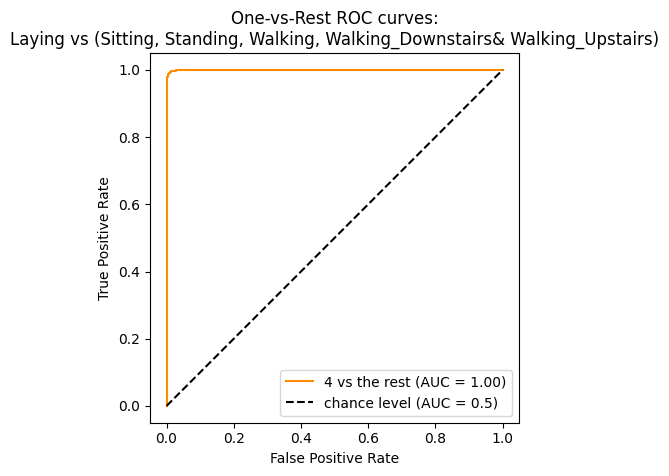

In [ ]:

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nLaying vs (Sitting, Standing, Walking, Walking_Downstairs& Walking_Upstairs)")
plt.legend()
plt.show()

In [ ]:
#Get the AUC
from sklearn.metrics import roc_auc_score
maxent_auc = roc_auc_score(y_train, maxent.predict_proba(X_train), multi_class='ovr')
print('AUC = {}'.format(maxent_auc))

AUC = 0.9998356659948463


**Naive Bayes Model (Choice: Gaussian)**

In [ ]:
  # Fit model
  gnb = GaussianNB()
  gnb.fit(X_train, y_train)

  # Use model to predict 
  gnb_y_pred = gnb.predict(X_test)

In [ ]:
# KFold Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=1)
result = cross_val_score(gnb, X_train, y_train, cv=cv, scoring='accuracy')

In [ ]:
# Calculate average accuracy score
avg_gnb_acc = np.mean(result)

# Print average accuracy score
print('Avg Naive Bayes cross-validation accuracy: {}%'.format(round((avg_gnb_acc*100),2)))

Avg Naive Bayes cross-validation accuracy: 72.65%


In [ ]:
# Generate  confusion matrix
gnb_confusion = confusion_matrix(y_test,gnb_y_pred)
print('Naive Bayes Confusion Matrix:\n{}'.format(gnb_confusion))
print('Naive Classification Report:\n{}'.format(classification_report(y_test, gnb_y_pred)))

Naive Bayes Confusion Matrix:
[[455  54   8   0   0  15]
 [111 368   5   0   0   7]
 [  0 211 323   0   0   3]
 [  0   0   0 416  42  38]
 [  0   0   0  80 257  83]
 [  0   0   0   9  11 451]]
Naive Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.86      0.83       532
           2       0.58      0.75      0.65       491
           3       0.96      0.60      0.74       537
           4       0.82      0.84      0.83       496
           5       0.83      0.61      0.70       420
           6       0.76      0.96      0.84       471

    accuracy                           0.77      2947
   macro avg       0.79      0.77      0.77      2947
weighted avg       0.79      0.77      0.77      2947



In [ ]:
# *****Multiclass is not supported for this method*****

#Predict probabilities
gnb_y_pred_probs = gnb.predict_proba(X_test)[:, 1]

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gnb_y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.show()

#Get the AUC
from sklearn.metrics import roc_auc_score
gnb_auc = roc_auc_score(y_test, gnb_y_pred_probs)
print('AUC = {}'.format(gnb_auc))

### **Multi class ROC & AUC Naive Bayes**


In [ ]:
y_score = gnb.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape 

(2947, 6)

In [ ]:
#checking the encoding of walking class :4
label_binarizer.transform([4])

array([[0, 0, 0, 1, 0, 0]])

In [ ]:
class_of_interest = 4
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

3

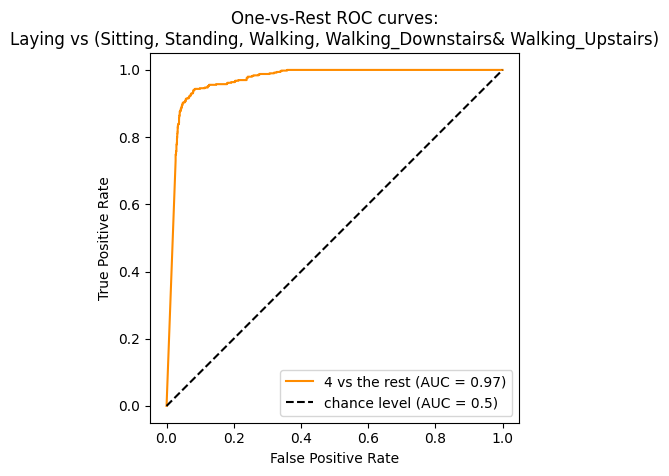

In [ ]:
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nLaying vs (Sitting, Standing, Walking, Walking_Downstairs& Walking_Upstairs)")
plt.legend()
plt.show()

In [ ]:
#Get the AUC
from sklearn.metrics import roc_auc_score
gnb_auc = roc_auc_score(y_train, gnb.predict_proba(X_train), multi_class='ovr')
print('AUC = {}'.format(gnb_auc))

AUC = 0.959153040778523


**Support Vector Machine Model (Non-linear)**

In [ ]:
# Fit model 
nlsvm = SVC(probability=True)
nlsvm.fit(X_train, y_train)

# Use model to predict
nlsvm_y_pred = nlsvm.predict(X_test)

In [ ]:
# KFold Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=1)
result = cross_val_score(nlsvm, X_train, y_train, cv=cv, scoring='accuracy')

In [ ]:
# Calculate average accuracy score
avg_nlsvm_acc = np.mean(result)

# Print average accuracy score
print('Avg Support Vector Machine cross-validation accuracy: {}%'.format(round((avg_nlsvm_acc*100),2)))

Avg Support Vector Machine cross-validation accuracy: 97.16%


In [ ]:
# Generate  confusion matrix
nlsvm_confusion = confusion_matrix(y_test,nlsm_y_pred)
print('Support Vector Machine Confusion Matrix:\n{}'.format(nlsvm_confusion))
print('Support Vector Machine Classification Report:\n{}'.format(classification_report(y_test, nlsvm_y_pred)))

Support Vector Machine Confusion Matrix:
[[520  11   0   1   0   0]
 [ 56 432   0   0   0   3]
 [  0   0 537   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   0   3 406  11]
 [  0   0   0  25   1 445]]
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.95      0.93       532
           2       0.94      0.89      0.91       491
           3       1.00      1.00      1.00       537
           4       0.94      0.98      0.96       496
           5       0.99      0.91      0.95       420
           6       0.93      0.96      0.94       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



In [ ]:
# *****Multiclass is not supported for this method*****

#Predict probabilities
lsvm_y_pred_probs = nlsvm.predict_proba(X_test)[:, 1]

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lsvm_y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Non Linear Support Vector ROC Curve')
plt.show()

#Get the AUC
from sklearn.metrics import roc_auc_score
lsvm_auc = roc_auc_score(y_test, lsvm_y_pred_probs)
print('AUC = {}'.format(nlsvm_auc))

### **Multi class ROC & AUC Support Vector Machine Classifier**


In [ ]:
y_score = nlsvm.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape 

(2947, 6)

In [ ]:
#checking the encoding of walking class :4
label_binarizer.transform([4])

array([[0, 0, 0, 1, 0, 0]])

In [ ]:
class_of_interest = 4
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

3

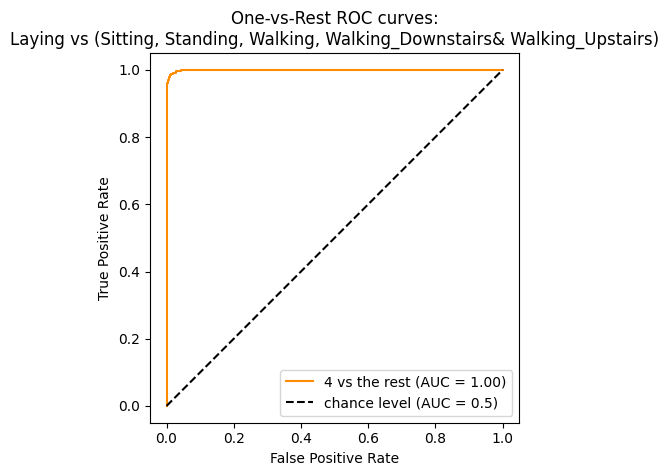

In [ ]:
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nLaying vs (Sitting, Standing, Walking, Walking_Downstairs& Walking_Upstairs)")
plt.legend()
plt.show()

In [ ]:
#Get the AUC
from sklearn.metrics import roc_auc_score
nlsvm_auc = roc_auc_score(y_train, nlsvm.predict_proba(X_train), multi_class='ovr')
print('AUC = {}'.format(nlsvm_auc))

AUC = 0.9992354923037872


Classifier Strengths:

(type I and type II error and overfitting)

Maxent - predicted the best for laying; high scores 
Naive-Bayes: - predicted the best for laying
SVM strength - predicted the best for laying; high scores


Classifier Weaknesses:

MaxEnt - seems to overfit; more type II error 
Naive Bayes - high error; lower scores; bigger tradeoff between precision and recall

Which classifier had the highest scores?
Maxent had the highest scores

Why do you think this classifier performed the best?
Despite Maxent had higher accuracy-precision-recall and F1-score we chose SVM as our best choice of classifier; the dimensionality of our data is over 500 and SVM supports that.


Trying Minmax scaler to the naive bayes model to combat negative data values 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train)
scaled_test_embed = scaler.transform(X_test)

In [ ]:
gnb = GaussianNB()
gnb.fit(scaled_train_embed, y_train)

GaussianNB()

In [ ]:
# Use model to predict 
gnb_y_pred_2 = gnb.predict(scaled_test_embed)

print(classification_report(y_test,gnb_y_pred_2 ))

              precision    recall  f1-score   support

           1       0.80      0.86      0.83       532
           2       0.58      0.75      0.65       491
           3       0.96      0.60      0.74       537
           4       0.82      0.84      0.83       496
           5       0.83      0.61      0.70       420
           6       0.76      0.96      0.84       471

    accuracy                           0.77      2947
   macro avg       0.79      0.77      0.77      2947
weighted avg       0.79      0.77      0.77      2947



The result is identical which indicates that having negative values does not effect model performance
